In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Orange3_colab/Orange3/Random_forest_Gradient_Boosting/2017DC1.csv')
df.shape

(20495, 30)

In [3]:
data = df.drop(['VALP_B1'], axis = 1)
target = df['VALP_B1']
data.shape

(20495, 29)

In [4]:
target.shape

(20495,)

In [5]:
# 5:5 데이터 분할~
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size = 0.5, random_state = 42
)

In [6]:
#랜덤 포레스트 모델
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
model = rf.fit(X_train, y_train)

#학습된 Classifier로 테스트 데이터세트를 이용해서 타깃 변수 예측값 생성
pred = model.predict(X_test)

print("Accuracy on training setL {:.5f}".format(model.score(X_train, y_train)))
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on training setL 1.00000
Accuracy on test set:0.83109


In [7]:
#정확도 100%로 과적합
#그리드 서치

rf = RandomForestClassifier(n_estimators = 100, random_state = 0)

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#StratifiedKFold의 random_state 옵션값을 0으로 고정
cross_validation = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
params = {'max_depth': range(20, 31), 'n_estimators': [100, 200]}

#GridSearchCV의 cv=cross_validation 옵션값은 StratifiedKFold의 random_state 옵션값을 적용해서 GridSearchCV를 실행할 때마다 항상 동일한 결과가 나오도록 보장
grid_rf = GridSearchCV(
    rf, param_grid = params, scoring = 'accuracy', cv = cross_validation, verbose = 1, n_jobs = -1
)
grid_rf.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_rf.best_score_))
print("GridSearchCV best parameter:", (grid_rf.best_params_))

Fitting 5 folds for each of 22 candidates, totalling 110 fits
GridSearchCV max accuracy:0.82922
GridSearchCV best parameter: {'max_depth': 28, 'n_estimators': 200}


In [8]:
#ROC Analysis
best_clf = grid_rf.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set : {:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set : {:.5f}".format(ROC_AUC))

Accuracy on test set : 0.83265
ROC AUC on test set : 0.90991


In [9]:
#머신러닝 모델 실행 후 변수 중요도 계산
#변수명을 index로 만들고 feature_importances를 매칭해서 나열한 데이터프레임 만들기
feature_names = list(data.columns)
dft = pd.DataFrame(np.round(best_clf.feature_importances_, 3),
                   index=feature_names, columns=['Feature_importances'])
#Featyre_importances의 값을 내림차순으로 정리
dft1 = dft.sort_values(by = 'Feature_importances', ascending = False)
dft1

,Feature_importances
HINCP,0.187
RMSP,0.088
ELEP,0.085
AGEP,0.076
GASP,0.064
SCHL,0.062
MV,0.059
BDSP,0.059
ACR,0.051
COW,0.031


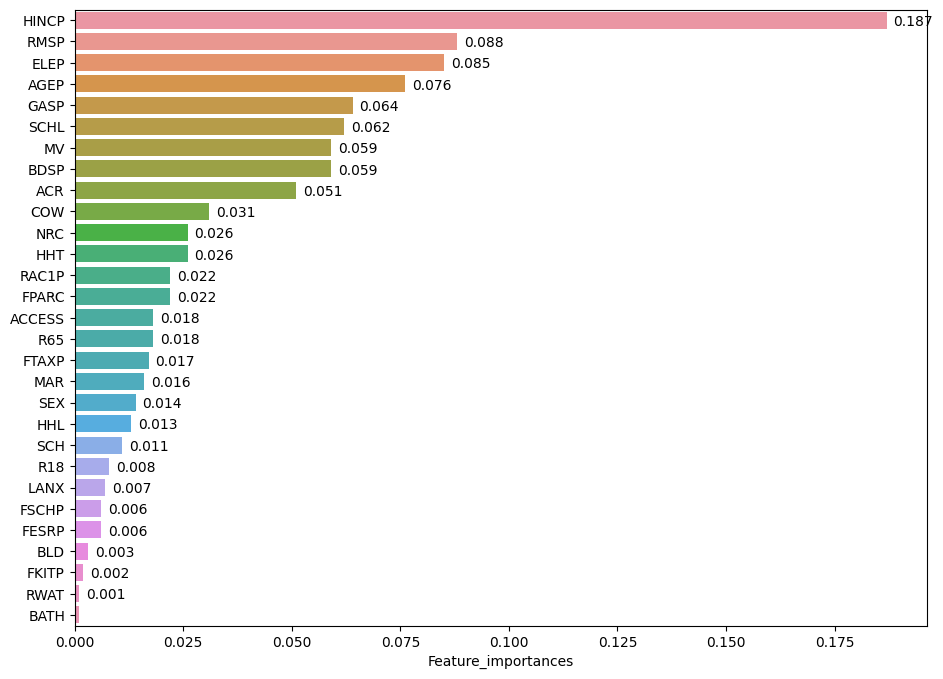

In [11]:
#변수 중요도로 나온 dft1의 막대그래프
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize = (11, 8))
ax = sns.barplot(y=dft1.index, x="Feature_importances", data=dft1)

for p in ax.patches:
  ax.annotate("%.3f" %p.get_width(), (p.get_x() + p.get_width(),
                                      p.get_y()+1.3), xytext = (5, 10), textcoords = 'offset points')

In [13]:
# 그레이디언트 부스팅 모델(기본 모델)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gr = GradientBoostingClassifier(random_state = 0)
model = gr.fit(X_train, y_train)

# 학습된 Classifier로 테스트 데이터세트를 이용해서 타깃 변수 예측값 생성
pred = model.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print("Accuracy on training setL {:.5f}".format(model.score(X_train, y_train)))
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on training setL 0.77330
Accuracy on test set:0.74171


In [17]:
gr = GradientBoostingClassifier(random_state=0)

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# StratifiedKFold의 random_state 옵션값을 0으로 고정
cross_validation = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)
params = {'max_depth':range(11,16), 'n_estimators':[100,200], 'learning_rate':[0.01, 0.1]}

#GridSearchCV의 cv=cross_validation 옵션값은 StratifiedKFold의 random_state 옵션값을 적용해 GridSearchCV를 실행할 때마다 항상 동일한 결과가 나오도록 보장
grid_gr = GridSearchCV(
    model, param_grid=params, scoring='accuracy', cv=cross_validation, n_jobs = -1)
grid_gr.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_gr.best_score_))
print("GridSearchCV best parameter:", (grid_gr.best_params_))


GridSearchCV max accuracy:0.83898
GridSearchCV best parameter: {'learning_rate': 0.1, 'max_depth': 13, 'n_estimators': 200}


In [19]:
best_clf = grid_gr.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.87354
ROC AUC on test set:0.94343


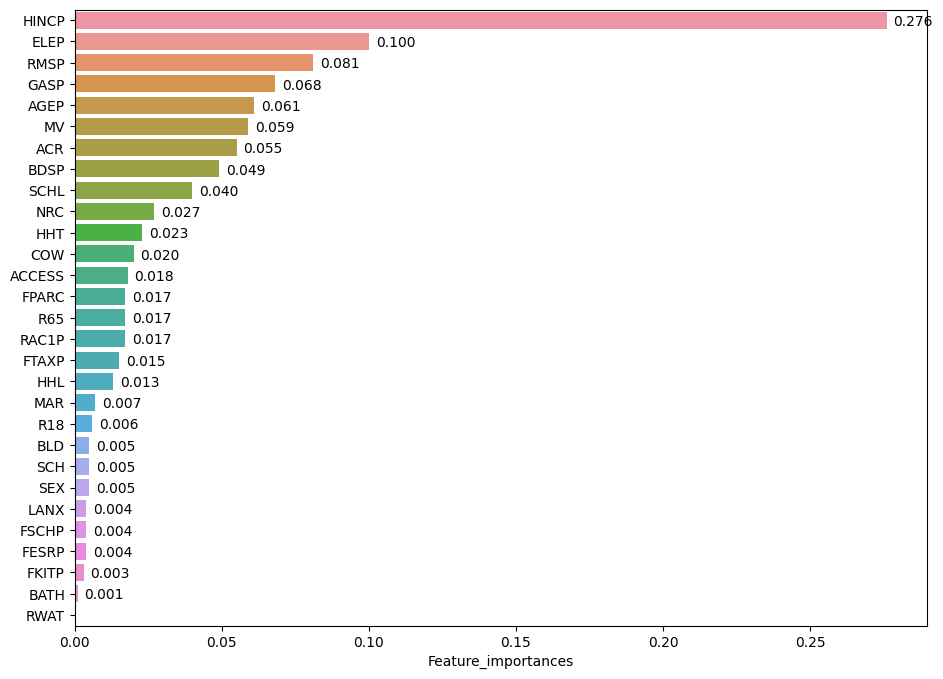

In [20]:
#머신러닝 모델 실행 후 변수 중요도 계산
#변수명을 index로 만들고 feature_importances를 매칭해서 나열한 데이터프레임 만들기
feature_names = list(data.columns)
dft = pd.DataFrame(np.round(best_clf.feature_importances_, 3),
                   index=feature_names, columns=['Feature_importances'])
#Featyre_importances의 값을 내림차순으로 정리
dft1 = dft.sort_values(by = 'Feature_importances', ascending = False)
#변수 중요도로 나온 dft1의 막대그래프
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize = (11, 8))
ax = sns.barplot(y=dft1.index, x="Feature_importances", data=dft1)

for p in ax.patches:
  ax.annotate("%.3f" %p.get_width(), (p.get_x() + p.get_width(),
                                      p.get_y()+1.3), xytext = (5, 10), textcoords = 'offset points')